# Group Members:<br>
+ Zahra Hoobakht

In [1]:
#%pip install tensorflow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from keras import metrics
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import cv2
import glob
import random

import warnings

import copy
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import average 
from skimage.io import imshow

Dataset Selection

Select a dataset identically to lab two (images). That is, the dataset must be image data. In terms of generalization performance, it is helpful to have a large dataset of identically sized images. It is fine to perform binary classification or multi-class classification.

The task of classifying images into different categories such as **building, forest, mountain and sea** is a popular application of computer vision. This type of image classification can be performed using machine learning algorithms that are trained on large datasets of labeled images.An image classification application is a type of artificial intelligence (AI) application that uses machine learning algorithms to automatically classify and categorize images based on their visual content. It's an essential tool for many industries that need to organize, sort and analyze large amounts of visual data, such as advertisment, travel agencies and social media.

In this lab, Natural landscapes images using Intel Image Classification (CNN - Keras) Dataset will be categorized and classified: <br> URL:https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras/notebook  

Natural landscapes image classification can be a useful technique for travel agencies to categorize and target their advertisements based on customers' interests in specific types of landscapes. Here are a few ways in the importance of image classification for the travel agency advertisements based on customers' interests in natural landscapes:

**Forests**: Image classification can be used to categorize images of forests based on factors such as tree species, foliage colors, and hiking or camping activities. This can be useful for creating targeted advertisements for customers who are interested in exploring forest landscapes and activities such as hiking or camping.

**Mountains**: Image classification can be used to categorize images of mountains based on factors such as height, scenery, and activities such as skiing or hiking. This can be useful for creating targeted advertisements for customers who are interested in mountain landscapes and activities such as skiing, snowboarding, or hiking.


**sea**: Image classification can be used to categorize images of seas based on factors such as location, water clarity, and activities such as fishing or boating. This can be useful for creating targeted advertisements for customers who are interested in visiting seas and exploring the natural landscapes and activities available.

**buildings**:Image classification can be used to identify and categorize images that showcase the cultural features of a destination, such as historical landmarks, museums, or local festivals. This can be useful for creating advertisements that highlight the unique cultural experiences that a travel destination has to offer.

By using image classification to categorize natural landscapes images based on customers' interests, travel agencies can create targeted advertisements that speak directly to potential customers and drive more bookings and revenue. This can help travel agencies to build strong customer relationships based on shared interests and values and stand out in a crowded marketplace.
Accuracy in the prediction tasks can bring higher benefit to the travel agencies and It can help the customers find the destination they are looking for to spend a good time in there but wrong predictions usually would not be harmful. In the worst case, it causes a minor financial loss and wasting time. 

in the original dataset existed classes are **building, forest, glacier, mountain, sea and street** due to saving time, memory and make them more recognizable and simpler I choosed **building, forest and mountain  classes.** <br><br>

At first, I am loading the data by reading all the images in all folders and convert them to numpy array so I can see them as array and perfrom statistical normalization. then I am changing the color to the grayscale because our task is to regonize different landscape categories which are recognizable even without having colors and basicly we just need to classfy based on shape of the things and edges. changing to grayscale helps reduce the data to 1/3 size of RGB data. If I was working with the original classes, I need color to differentiate between mountain and glacier.Also our data should be normalized in order to have the same size pictures. in this way, different sizes, different light intensity and different spatial locations do not have any effect on classification

In [2]:
class_names = [ "buildings", "forest", "mountain"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
keys = list(class_names_label.keys())  
values = list(class_names_label.values())  
class_names_label 

{'buildings': 0, 'forest': 1, 'mountain': 2}

In [3]:
DataDir=r'C:\Users\sxb200167\Downloads\seg_train\seg_train'
Categories=["buildings", "forest", "mountain" ]
img_size=80
images=[]
images_flat=np.zeros((6974,img_size*img_size))
labels=[]
#df = pd.DataFrame(columns=range(0, (img_size*img_size)))
i=0
for category in Categories:
    path=os.path.join(DataDir,category)
    class_num=class_names_label[category]
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        image=cv2.resize(image,(img_size,img_size))
        image_flat=image.flatten()
        
        images.append(image)
        images_flat[i]=(image_flat.reshape(1,img_size*img_size))
        
        i+=1
        #df.loc[img]=pd.Series(image_flat[i] for i in range(0, (img_size*img_size)))
        labels.append(class_num)
    

I reduced the size of images to (80*80) To reduce the number of primary features while keeping them in recognizable quality . Now I want to visualize some random pictures with their labels

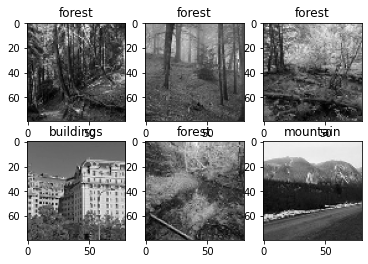

In [4]:
a=random.sample(range(0, 6974), 6)
rows=2
col=3
fig=plt.figure()
i=1
for j in a:

    ax=fig.add_subplot(rows,col,i)
    plt.imshow(images[j],cmap='gray')
    ax.title.set_text(str(keys[values.index(labels[j])]))
    i+=1
    

## Preparation (3 points total)  
## [1.5 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

In [5]:

#{'buildings': 0, 'forest': 1, 'mountain': 2}
print('the number of buildings pictures is',labels.count(0))
print('the number of forest pictures is',labels.count(1))
print('the number of mountain pictures is',labels.count(2))

the number of buildings pictures is 2191
the number of forest pictures is 2271
the number of mountain pictures is 2512


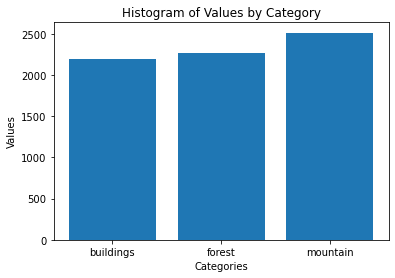

In [6]:
data = [labels.count(0),labels.count(1),labels.count(2)]
Categories=["buildings", "forest", "mountain" ]



plt.bar(Categories, data)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Histogram of Values by Category")
plt.show()

As it can be seen in the above graph, my database is nearly balanced and predication tast for my target images is not critical to be exactly right.So accuracy metric should work good on our dataset. In lab 2, I used accuracy metric and got 45% accuracy rate which is considered as good rate for our prediction task. Now I want to try recall metric to see what is the recall rate for our data. So let's suppose if we incorrectly classify the classes the pentaly cost for the company is so high. for example, the travel agency is so famous for introducing right places to the right costumers and if they predict these classes wrongly, they will lose their credibility. 

## [1.5 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice.

for this lab, because the data is nearly balanced, I can use train-test_split same as lab2, but just for the purpose of learning and because I am curious to see how cross-validation works on the images . I am once again considering that our travel agency is so famous that predictions are so important to be correct and even slight imbalancing in the data is not acceptable. So, I will use k-fold cross validation to remove the slight imbalance in data. as cross-validation's use is to evaluate how well a model generalizes to new data by simulating the process of training and testing the model on multiple subsets of the data, I am hoping I can increase accuracy of model to better perform classification task.

In [7]:
images_flat.shape

(6974, 6400)

In [8]:
h=img_size
w=img_size
std = StandardScaler()
normalizedimage=std.fit_transform(images_flat)
normalizedimage


array([[ 1.55359972,  1.55522018,  1.55929599, ..., -0.64484334,
        -0.78714195, -0.41654012],
       [-0.30122607, -0.32977445, -0.35463631, ..., -0.89458718,
        -0.62523816, -0.27156803],
       [ 0.63315986,  0.61970432,  0.609315  , ...,  1.22823551,
         1.15570356,  1.1781529 ],
       ...,
       [ 1.05154162,  1.05255494,  1.04239457, ..., -0.55564911,
        -1.0569816 , -0.94206396],
       [ 1.66516819,  1.65296064,  1.64311785, ..., -0.68052103,
        -0.53529161, -0.67024128],
       [ 0.08926357,  0.11703909,  0.1343245 , ..., -0.3594218 ,
         0.25623804,  0.29019883]])

In [9]:
normalizedimage.shape

(6974, 6400)

In [10]:
np.size(labels)

6974

## Modeling (6 points total)
## [1.5 points]  Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You can use the keras ImageGenerator as a pre-processing step OR in the optimization loop. You can also use the Keras-cv augmenter (a separate package: https://keras.io/keras_cv/Links to an external site.)

Data augmentation, also called data expansion, is a technique used to increase the size of a dataset by generating new samples from the existing ones through random transformations. In Keras, data augmentation can be achieved using the ImageDataGenerator class, which applies a set of random transformations to the images during the training process.

For natural images, some of the appropriate data augmentation techniques include:

Horizontal and vertical flips: Flipping the images horizontally or vertically can create new samples that are similar to the original ones, and can help the model learn rotation invariance.

Random rotation: Rotating the images by a random angle can create new samples that are similar to the original ones, and can help the model learn rotational invariance.

Random zooming and cropping: Zooming in or out of the images or randomly cropping them can create new samples that are similar to the original ones, and can help the model learn scale invariance.

In the context of building, forest, and mountain images, I have chosen not to use vertical flipping as it does not have any meaningful impact on the image recognition process. However, other data augmentation techniques such as rotation and zooming can be helpful in improving recognition accuracy, depending on how the images were captured.

In [11]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.1,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

## [2 points] Create a convolutional neural network to use on your data using Keras. Investigate at least two different convolutional network architectures (and investigate changing some parameters of each architecture such as the number of filters--at minimum have two variations of each network for a total of four models trained). Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). Be sure that models converge.

In [12]:
%%time 

cnn = Sequential()

# add in augmentations directly
cnn.add(RandomFlip("horizontal"))
cnn.add(RandomRotation(0.2))

# let's start with an AlexNet style convolutional phase
cnn.add(Conv2D(filters=32,
                input_shape = (h,w,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn.add(Dense(3, activation='sigmoid'))




CPU times: total: 93.8 ms
Wall time: 81 ms


In [13]:
skf = StratifiedKFold(n_splits=10)
y = np.array(labels)
X=normalizedimage

X_train=[]
y_train=[]
X_test=[]
y_test=[]

# warnings.filterwarnings("ignore", category=FutureWarning)
# pipe_lr = Pipeline([('pca', PCA(n_components=500,random_state=1)),
#                     ('clf', LogisticRegression(class_weight='balanced', random_state=1))])
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    Xtrain, ytrain = X[train_index], y[train_index]
    Xtest, ytest = X[test_index], y[test_index]
    X_train.append(Xtrain)
    X_test.append(Xtest)
    y_train.append(ytrain)
    y_test.append(ytest)
    ytrain_ohe = keras.utils.to_categorical(ytrain, num_classes=3)
    ytest_ohe = keras.utils.to_categorical(ytest, num_classes=3)
    tmps=datagen.flow(Xtrain.reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    
    # Let's train the model 
    cnn.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                  optimizer='adam', # 'adam'
                  metrics=[metrics.Recall()])
    history=cnn.fit(tmps,steps_per_epoch=int(len(Xtrain.reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(Xtest.reshape((-1,w,h,1)), ytest_ohe),callbacks=[EarlyStopping(monitor='val_loss', patience=2)])
#     val=datagen.flow(Xtest.reshape((-1,w,h,1)), ytest_ohe, batch_size=1)
#     # the flow method yields batches of images indefinitely, with the given transformations
     #history = cnn.fit_generator(tmps, 
#                               steps_per_epoch=1, 
#                               epochs=10, 
#                               validation_data=val, 
#                               validation_steps=1)
                  
#     pipe_lr.fit(Xtrain, ytrain)
#     y_pred = pipe_lr.predict(Xtest)
#     print(classification_report(ytest, y_pred))
#     unique, counts = np.unique(ytrain, return_counts=True)
#     class_ratio = dict(zip(unique, counts / len(ytrain)))
    
#     # Print the class ratio for this fold
#     print("Fold {}: Class Ratio = {}".format(fold, class_ratio))
#     warnings.filterwarnings("ignore", category=FutureWarning)
   
#     with warnings.catch_warnings():
#         warnings.filterwarnings("ignore")
    


Epoch 1/100
49/49 [==============================] - 37s 687ms/step - loss: 1.0094 - recall: 0.7763 - val_loss: 0.7650 - val_recall: 0.8138
Epoch 2/100
49/49 [==============================] - 33s 674ms/step - loss: 0.7041 - recall: 0.7959 - val_loss: 0.8832 - val_recall: 0.7894
Epoch 3/100
49/49 [==============================] - 33s 676ms/step - loss: 0.6619 - recall: 0.8020 - val_loss: 0.7513 - val_recall: 0.7679
Epoch 4/100
49/49 [==============================] - 34s 700ms/step - loss: 0.6411 - recall: 0.7808 - val_loss: 0.9300 - val_recall: 0.7235
Epoch 5/100
49/49 [==============================] - 34s 691ms/step - loss: 0.5938 - recall: 0.7947 - val_loss: 0.8604 - val_recall: 0.7034
Epoch 1/100
49/49 [==============================] - 37s 694ms/step - loss: 0.5969 - recall_1: 0.7828 - val_loss: 0.8932 - val_recall_1: 0.7278
Epoch 2/100
49/49 [==============================] - 34s 686ms/step - loss: 0.5229 - recall_1: 0.8331 - val_loss: 0.6043 - val_recall_1: 0.8209
Epoch 3/100


In [14]:
for i in range(0,10):
    
    ytrain_ohe = keras.utils.to_categorical(y_train[i], num_classes=3)
    ytest_ohe = keras.utils.to_categorical(y_test[i], num_classes=3)
    tmps=datagen.flow(X_train[i].reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    history1=cnn.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe))
  

Epoch 1/100
49/49 [==============================] - 36s 726ms/step - loss: 0.2792 - recall_9: 0.9527 - val_loss: 3.1621 - val_recall_9: 0.7350
Epoch 2/100
49/49 [==============================] - 35s 704ms/step - loss: 0.3011 - recall_9: 0.9382 - val_loss: 1.7742 - val_recall_9: 0.7536
Epoch 3/100
49/49 [==============================] - 35s 706ms/step - loss: 0.3251 - recall_9: 0.9359 - val_loss: 4.8855 - val_recall_9: 0.6705
Epoch 4/100
49/49 [==============================] - 34s 703ms/step - loss: 0.3061 - recall_9: 0.9424 - val_loss: 1.9885 - val_recall_9: 0.7278
Epoch 5/100
49/49 [==============================] - 35s 719ms/step - loss: 0.2930 - recall_9: 0.9392 - val_loss: 2.9630 - val_recall_9: 0.7077
Epoch 6/100
49/49 [==============================] - 35s 721ms/step - loss: 0.3036 - recall_9: 0.9563 - val_loss: 2.3271 - val_recall_9: 0.7393
Epoch 7/100
49/49 [==============================] - 35s 718ms/step - loss: 0.2967 - recall_9: 0.9465 - val_loss: 2.0308 - val_recall_9:

Text(0.5, 0, 'epochs')

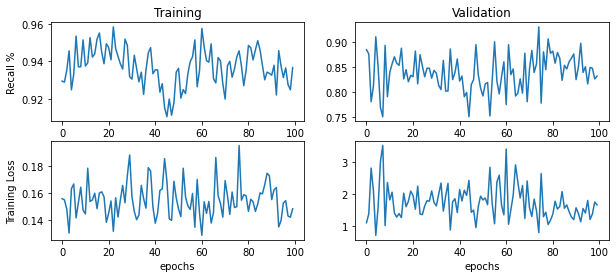

In [15]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history1.history['recall_9'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history1.history['val_recall_9'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history1.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')

for model 2, I added another convolutional layer with 128 filters

In [16]:
%%time 

cnn1 = Sequential()

# add in augmentations directly
cnn1.add(RandomFlip("horizontal"))
cnn1.add(RandomRotation(0.2))

# let's start with an AlexNet style convolutional phase
cnn1.add(Conv2D(filters=32,
                input_shape = (h,w,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn1.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn1.add(Conv2D(filters=128,
                input_shape = (h,w,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

cnn1.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn1.add(Dropout(0.5)) # add some dropout for regularization after conv layers
cnn1.add(Flatten())
cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn1.add(Dense(3, activation='softmax'))




CPU times: total: 46.9 ms
Wall time: 50 ms


In [17]:
from keras.optimizers import Adam
cnn1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                  optimizer='adam', # 'adam'
                  metrics=[metrics.Recall()])
for i in range(0,10):
    
    ytrain_ohe = keras.utils.to_categorical(y_train[i], num_classes=3)
    ytest_ohe = keras.utils.to_categorical(y_test[i], num_classes=3)
    tmps=datagen.flow(X_train[i].reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    history2=cnn1.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe))
  

Epoch 1/100
49/49 [==============================] - 131s 3s/step - loss: 1.2070 - recall_10: 0.4257 - val_loss: 0.7537 - val_recall_10: 0.6261
Epoch 2/100
49/49 [==============================] - 118s 2s/step - loss: 0.7201 - recall_10: 0.6114 - val_loss: 0.6852 - val_recall_10: 0.6605
Epoch 3/100
49/49 [==============================] - 134s 3s/step - loss: 0.6512 - recall_10: 0.6743 - val_loss: 0.6193 - val_recall_10: 0.7178
Epoch 4/100
49/49 [==============================] - 118s 2s/step - loss: 0.6093 - recall_10: 0.7053 - val_loss: 0.5526 - val_recall_10: 0.7393
Epoch 5/100
49/49 [==============================] - 120s 2s/step - loss: 0.5709 - recall_10: 0.7192 - val_loss: 0.6485 - val_recall_10: 0.7106
Epoch 6/100
49/49 [==============================] - 113s 2s/step - loss: 0.5250 - recall_10: 0.7572 - val_loss: 0.5990 - val_recall_10: 0.7350
Epoch 7/100
49/49 [==============================] - 119s 2s/step - loss: 0.5142 - recall_10: 0.7698 - val_loss: 0.5740 - val_recall_10:

Text(0.5, 0, 'epochs')

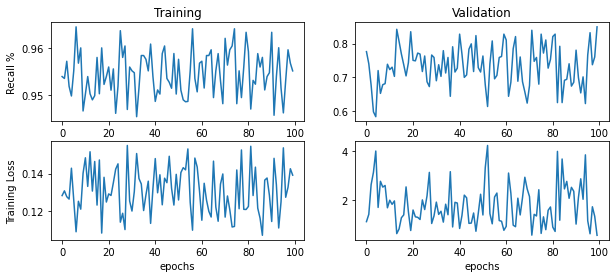

In [18]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history2.history['recall_10'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history2.history['val_recall_10'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history2.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')

for model 3, I am changing model 1's kernel from max pooling to average pooling

In [20]:
from keras.layers import Conv2D, AveragePooling2D


cnn2 = Sequential()

# add in augmentations directly
cnn2.add(RandomFlip("horizontal"))
cnn2.add(RandomRotation(0.2))

# let's start with an AlexNet style convolutional phase
cnn2.add(Conv2D(filters=32,
                input_shape = (h,w,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn2.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn2.add(AveragePooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn2.add(Dense(3, activation='sigmoid'))




In [21]:
from keras.optimizers import Adam
cnn2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                  optimizer='adam', # 'adam'
                  metrics=[metrics.Recall()])
for i in range(0,10):
    
    ytrain_ohe = keras.utils.to_categorical(y_train[i], num_classes=3)
    ytest_ohe = keras.utils.to_categorical(y_test[i], num_classes=3)
    tmps=datagen.flow(X_train[i].reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    history3=cnn2.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe))
  

Epoch 1/100
49/49 [==============================] - 38s 714ms/step - loss: 1.0114 - recall_11: 0.8110 - val_loss: 0.7530 - val_recall_11: 0.9140
Epoch 2/100
49/49 [==============================] - 34s 685ms/step - loss: 0.7017 - recall_11: 0.9176 - val_loss: 0.8040 - val_recall_11: 0.9327
Epoch 3/100
49/49 [==============================] - 34s 686ms/step - loss: 0.6787 - recall_11: 0.9090 - val_loss: 0.6517 - val_recall_11: 0.9499
Epoch 4/100
49/49 [==============================] - 33s 679ms/step - loss: 0.6095 - recall_11: 0.9320 - val_loss: 0.7470 - val_recall_11: 0.9069
Epoch 5/100
49/49 [==============================] - 33s 680ms/step - loss: 0.5951 - recall_11: 0.9035 - val_loss: 0.6871 - val_recall_11: 0.9327
Epoch 6/100
49/49 [==============================] - 34s 687ms/step - loss: 0.5963 - recall_11: 0.9265 - val_loss: 0.6203 - val_recall_11: 0.9713
Epoch 7/100
49/49 [==============================] - 34s 685ms/step - loss: 0.5394 - recall_11: 0.9233 - val_loss: 0.5701 - 

Text(0.5, 0, 'epochs')

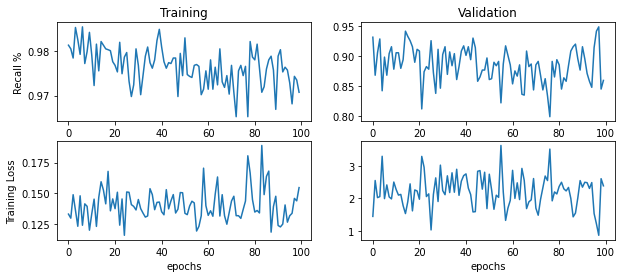

In [22]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history3.history['recall_11'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history3.history['val_recall_11'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history3.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history3.history['val_loss'])
plt.xlabel('epochs')

In [23]:
 

cnn3 = Sequential()

# add in augmentations directly
cnn3.add(RandomFlip("horizontal"))
cnn3.add(RandomRotation(0.2))

# let's start with an AlexNet style convolutional phase
cnn3.add(Conv2D(filters=32,
                input_shape = (h,w,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn3.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn3.add(Conv2D(filters=128,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn3.add(AveragePooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn3.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn3.add(Flatten())
cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn3.add(Dense(3, activation='sigmoid'))




In [24]:
from keras.optimizers import Adam
cnn3.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                  optimizer='adam', # 'adam'
                  metrics=[metrics.Recall()])
for i in range(0,10):
    
    ytrain_ohe = keras.utils.to_categorical(y_train[i], num_classes=3)
    ytest_ohe = keras.utils.to_categorical(y_test[i], num_classes=3)
    tmps=datagen.flow(X_train[i].reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    history4=cnn3.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe))
  

Epoch 1/100
49/49 [==============================] - 99s 2s/step - loss: 1.1046 - recall_12: 0.8318 - val_loss: 0.6782 - val_recall_12: 0.9169
Epoch 2/100
49/49 [==============================] - 94s 2s/step - loss: 0.6964 - recall_12: 0.9073 - val_loss: 0.5943 - val_recall_12: 0.9384
Epoch 3/100
49/49 [==============================] - 93s 2s/step - loss: 0.6279 - recall_12: 0.9188 - val_loss: 0.7599 - val_recall_12: 0.9255
Epoch 4/100
49/49 [==============================] - 93s 2s/step - loss: 0.6177 - recall_12: 0.9349 - val_loss: 0.9052 - val_recall_12: 0.9126
Epoch 5/100
49/49 [==============================] - 93s 2s/step - loss: 0.5235 - recall_12: 0.9363 - val_loss: 0.6806 - val_recall_12: 0.9456
Epoch 6/100
49/49 [==============================] - 92s 2s/step - loss: 0.5235 - recall_12: 0.9221 - val_loss: 0.6906 - val_recall_12: 0.9542
Epoch 7/100
49/49 [==============================] - 93s 2s/step - loss: 0.5050 - recall_12: 0.9469 - val_loss: 0.8516 - val_recall_12: 0.9284

Text(0.5, 0, 'epochs')

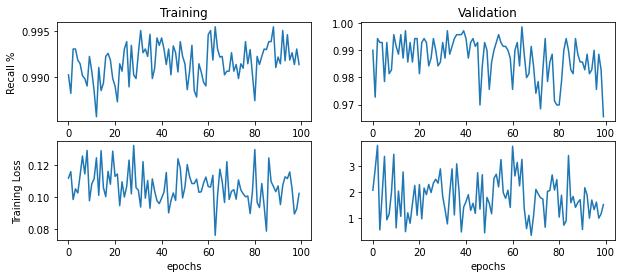

In [25]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history4.history['recall_12'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history4.history['val_recall_12'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history4.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history4.history['val_loss'])
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

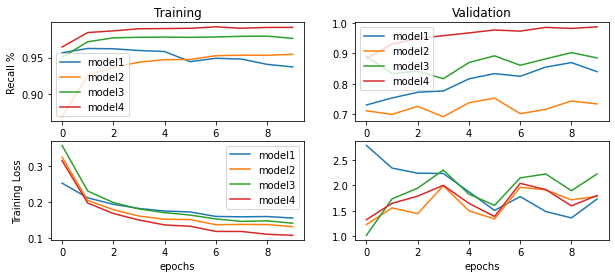

In [36]:
%matplotlib inline
### Mean values
recall_9=[0.956570707070707,0.96254,0.962129,0.959755,0.958335,0.944396,0.94906,0.94797,0.940672,0.937078]
recall_10=[0.868487,0.925293,0.936685,0.943579,0.947145,0.947443,0.952549,0.953362,0.953152,0.954537]
recall_11=[0.950393,0.971801,0.977198,0.977993,0.978222,0.977881,0.978435,0.979326,0.979542,0.976483]
recall_12=[0.964566,0.984510000000001,0.98685,0.989728,0.990026,0.990402,0.992365999999999,0.990456,0.991559999999999,0.991604999999999]
loss_9=[0.252017171717172,0.211226,0.193163,0.181545,0.174472,0.171864,0.159454,0.158336,0.159181,0.154986]
loss_10=[0.324765,0.204009,0.178345,0.160489,0.151703,0.150646,0.136514,0.137193,0.136845,0.131067]
loss_11=[0.357028,0.230165,0.198127,0.180352,0.170059,0.16321,0.152497,0.145714,0.147275,0.140555]
loss_12=[0.314585,0.19667,0.167521,0.149538,0.135786,0.132142,0.11772,0.117588,0.109838,0.106907]
Val_loss9=[2.78409595959596,2.338521,2.238579,2.232606,1.87132,1.505473,1.777464,1.483579,1.358175,1.729263]
Val_loss10=[1.227907,1.555752,1.441427,1.993396,1.497929,1.338445,1.961742,1.910773,1.712514,1.783801]
Val_loss11=[1.015926,1.73333,1.944129,2.299608,1.826114,1.605477,2.145929,2.2229,1.893299,2.223848]
Val_loss12=[1.324164,1.645537,1.786789,1.999686,1.644818,1.386193,2.038881,1.915137,1.595865,1.799736]
val_recall9=[0.730337373737373,0.753211,0.772103999999999,0.776318,0.816187,0.833427,0.824592,0.855007,0.869687,0.839817]
val_recall10=[0.710978,0.699527,0.725685,0.691678,0.737605,0.752791,0.701693,0.715764,0.743361,0.733727]
val_recall11=[0.889655,0.833438,0.841462,0.816597,0.869716,0.891966,0.860862,0.882055,0.90238,0.885128]
val_recall12=[0.883438,0.930427,0.948999,0.958234999999999,0.967313,0.976896999999999,0.973277999999999,0.985525,0.982126,0.987274]

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(recall_9,label='model1')
plt.plot(recall_10,label='model2')
plt.plot(recall_11,label='model3')
plt.plot(recall_12,label='model4')
plt.legend()

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(val_recall9,label='model1')
plt.plot(val_recall10,label='model2')
plt.plot(val_recall11,label='model3')
plt.plot(val_recall12,label='model4')
plt.title('Validation')
plt.legend()

plt.subplot(2,2,3)
plt.plot(loss_9,label='model1')
plt.plot(loss_10,label='model2')
plt.plot(loss_11,label='model3')
plt.plot(loss_12,label='model4')
plt.ylabel('Training Loss')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2,2,4)
plt.plot(Val_loss9,label='model1')
plt.plot(Val_loss10,label='model2')
plt.plot(Val_loss11,label='model3')
plt.plot(Val_loss12,label='model4')
plt.xlabel('epochs')

from above graph, it can be seen that model 4 has the better performance because its recall and validation is higher. it seems that as model 4 has more convolutional layers compared to the other models, which can allow it to learn more complex features and patterns in the input images. The additional layers may enable the model to detect more subtle details in the images, which can improve its recall. Also, model 4 uses average pooling instead of max pooling, which may allow it to retain more information about the input images. Max pooling only keeps the maximum value in each pooling window, discarding the other values. In contrast, average pooling retains more information by averaging the values in each pooling window. This can lead to better feature preservation and improved recall and validation. Overally average pooling (model 3,4) keeps more details has most effect on increasing the recall and then increasing filter (model 2 compare with model1) increase the recall because of learning complexity and more details 

In [28]:
%%time 

mlp = Sequential()
    
# add one layer on flattened output
mlp.add(Dropout(0.5)) # add some dropout for regularization after conv layers
mlp.add(Flatten())
mlp.add(Dense(128, activation='relu'))
mlp.add(Dropout(0.5)) # add some dropout for regularization, again!
mlp.add(Dense(3, activation='softmax'))



mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Recall()])

for i in range(0,10):
    ytrain_ohe = keras.utils.to_categorical(y_train[i], num_classes=3)
    ytest_ohe = keras.utils.to_categorical(y_test[i], num_classes=3)
    tmps=datagen.flow(X_train[i].reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    history5=mlp.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe))
  

Epoch 1/100
49/49 [==============================] - 5s 82ms/step - loss: 2.4081 - recall_13: 0.5224 - val_loss: 1.5680 - val_recall_13: 0.6418
Epoch 2/100
49/49 [==============================] - 4s 72ms/step - loss: 2.2178 - recall_13: 0.5437 - val_loss: 1.5525 - val_recall_13: 0.6662
Epoch 3/100
49/49 [==============================] - 4s 72ms/step - loss: 1.9309 - recall_13: 0.5710 - val_loss: 1.4974 - val_recall_13: 0.6160
Epoch 4/100
49/49 [==============================] - 4s 72ms/step - loss: 1.6297 - recall_13: 0.5780 - val_loss: 1.1646 - val_recall_13: 0.6361
Epoch 5/100
49/49 [==============================] - 4s 73ms/step - loss: 1.2847 - recall_13: 0.5878 - val_loss: 1.1251 - val_recall_13: 0.6347
Epoch 6/100
49/49 [==============================] - 4s 73ms/step - loss: 1.2565 - recall_13: 0.5886 - val_loss: 0.9871 - val_recall_13: 0.6576
Epoch 7/100
49/49 [==============================] - 4s 74ms/step - loss: 1.0784 - recall_13: 0.6090 - val_loss: 0.9536 - val_recall_13:

Text(0.5, 0, 'epochs')

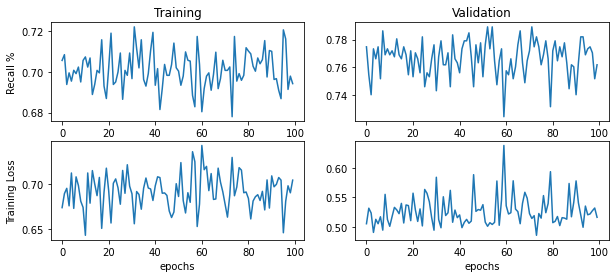

In [29]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history5.history['recall_13'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history5.history['val_recall_13'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history5.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history5.history['val_loss'])
plt.xlabel('epochs')

Here, I am designing the same layers as CNN model 4  for MLP. 

In [47]:
%%time 

mlp = Sequential()
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dense(128, activation='relu'))    
# add one layer on flattened output
mlp.add(Dropout(0.5)) # add some dropout for regularization after conv layers
mlp.add(Flatten())
mlp.add(Dense(128, activation='relu'))
mlp.add(Dropout(0.5)) # add some dropout for regularization, again!
mlp.add(Dense(3, activation='softmax'))



mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.Recall()])

for i in range(0,2):
    ytrain_ohe = keras.utils.to_categorical(y_train[i], num_classes=3)
    ytest_ohe = keras.utils.to_categorical(y_test[i], num_classes=3)
    tmps=datagen.flow(X_train[i].reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    history6=mlp.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe)callbacks=[EarlyStopping(monitor='val_loss', patience=50)])
  

Epoch 1/50
49/49 [==============================] - 104s 2s/step - loss: 2.2314 - recall_19: 0.4295 - val_loss: 0.8204 - val_recall_19: 0.4384
Epoch 2/50
49/49 [==============================] - 100s 2s/step - loss: 0.8143 - recall_19: 0.4914 - val_loss: 0.8036 - val_recall_19: 0.5516
Epoch 3/50
49/49 [==============================] - 101s 2s/step - loss: 0.8218 - recall_19: 0.5094 - val_loss: 0.7827 - val_recall_19: 0.5673
Epoch 4/50
49/49 [==============================] - 100s 2s/step - loss: 0.7935 - recall_19: 0.5482 - val_loss: 0.7437 - val_recall_19: 0.5544
Epoch 5/50
49/49 [==============================] - 100s 2s/step - loss: 0.7645 - recall_19: 0.5518 - val_loss: 0.7106 - val_recall_19: 0.6189
Epoch 6/50
49/49 [==============================] - 101s 2s/step - loss: 0.7445 - recall_19: 0.5824 - val_loss: 0.6924 - val_recall_19: 0.6361
Epoch 7/50
49/49 [==============================] - 100s 2s/step - loss: 0.7561 - recall_19: 0.5783 - val_loss: 0.7212 - val_recall_19: 0.6074

Text(0.5, 0, 'epochs')

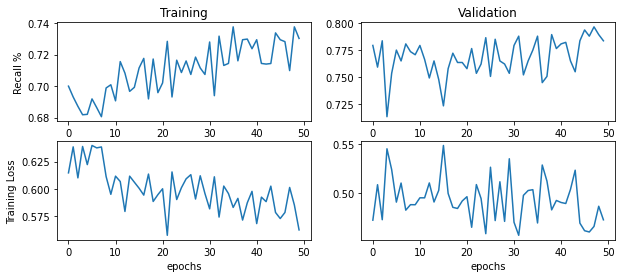

In [50]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history6.history['recall_19'])

plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history6.history['val_recall_19'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history6.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history6.history['val_loss'])
plt.xlabel('epochs')

In [63]:
#history values
historyrecall_12=[1.1046,0.6964,0.6279,0.6177,0.5235,0.5235,0.505,0.509,0.4765,0.4498,0.438,0.4266,0.4167,0.4282,0.3946,0.411,0.4302,0.3772,0.3808,0.3639,0.355,0.4001,0.3601,0.3602,0.345,0.3513,0.3253,0.3577,0.3334,0.3192,0.3015,0.3035,0.3173,0.3052,0.2865,0.2826,0.3037,0.2956,0.293,0.3085,0.2991,0.2894,0.2737,0.2833,0.315,0.2733,0.2697,0.2598,0.2628,0.2486]
historyval_recall12=[0.8318,0.9073,0.9188,0.9349,0.9363,0.9221,0.9469,0.9497,0.9604,0.9527,0.9482,0.9429,0.9498,0.9555,0.9449,0.938,0.9427,0.951,0.9604,0.9645,0.958,0.9427,0.9539,0.9555,0.9494,0.9735,0.9703,0.9624,0.9489,0.9559,0.9522,0.9571,0.9592,0.96,0.9682,0.9687,0.9669,0.9654,0.9654,0.9621,0.9633,0.9646,0.9727,0.9687,0.9665,0.9657,0.9706,0.982,0.9776,0.9812]
historyloss_12=[0.6782,0.5943,0.7599,0.9052,0.6806,0.6906,0.8516,0.7899,0.5996,0.8634,0.7678,0.6118,0.6828,0.5421,0.9852,0.5748,0.7883,0.7461,0.9138,0.7141,1.0237,0.6878,0.7965,0.7168,0.8928,1.1954,1.6181,0.8272,0.8955,1.3156,1.2663,0.9803,1.2528,1.1662,1.6502,0.9322,1.2588,0.756,1.9283,1.8438,1.2534,1.65,1.1708,1.5132,1.8452,1.1606,1.9083,1.7507,1.6046,1.4125]
historyVal_loss12=[0.9169,0.9384,0.9255,0.9126,0.9456,0.9542,0.9284,0.9441,0.9527,0.8997,0.8954,0.8997,0.9097,0.937,0.8968,0.9226,0.904,0.9341,0.9083,0.9269,0.861,0.9183,0.9284,0.9585,0.8868,0.9011,0.8195,0.9355,0.8739,0.8324,0.8739,0.8868,0.8539,0.8682,0.8367,0.9198,0.8539,0.9269,0.8052,0.8152,0.851,0.8295,0.8926,0.8395,0.8481,0.8739,0.8467,0.8496,0.8553,0.884]


Text(0.5, 0, 'epochs')

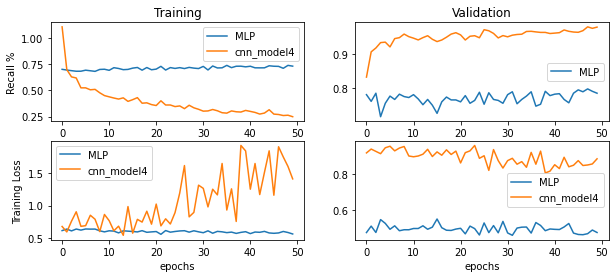

In [65]:
%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history5.history['recall_19'],label='MLP')
plt.plot(historyrecall_12,label='cnn_model4')
plt.legend()
plt.ylabel('Recall %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history5.history['val_recall_19'],label='MLP')
plt.plot(historyval_recall12)
plt.legend()
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history5.history['loss'],label='MLP')
plt.plot(historyloss_12,label='cnn_model4')
plt.legend()
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history5.history['val_loss'],label='MLP')
plt.plot(historyVal_loss12,label='cnn_model4')
plt.legend()
plt.xlabel('epochs')

Our data shows that CNNs are more effective (99%) than MLP (70%) because they can extract local and spatial features from the images.
CNNs can capture the relevant information in the image in a more effective and efficient way than MLPs. Additionally, CNNs can be more parameter-efficient than MLPs because they can reuse weights across the spatial dimensions of the input image.

In [45]:
from keras.applications.vgg16 import VGG16


# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model so they're not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 as a feature extractor
model = Sequential()
model.add(vgg16)
# add in augmentations directly
model.add(RandomFlip("horizontal"))
model.add(RandomRotation(0.2))

# let's start with an AlexNet style convolutional phase
model.add(Conv2D(filters=32,
                input_shape = (h,w,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
model.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
model.add(Conv2D(filters=128,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
model.add(AveragePooling2D(pool_size=(2, 2)))
# Add some new layers on top of the pre-trained model
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[metrics.Recall()])


In [60]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 random_flip_4 (RandomFlip)  (None, 7, 7, 512)         0         
                                                                 
 random_rotation_4 (RandomRo  (None, 7, 7, 512)        0         
 tation)                                                         
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 32)          147488    
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         73856     
                                                      

In [46]:

for i in range(0,2):
    
    ytrain_ohe = keras.utils.to_categorical(y_train[i], num_classes=3)
    ytest_ohe = keras.utils.to_categorical(y_test[i], num_classes=3)
    tmps=datagen.flow(X_train[i].reshape((-1,w,h,1)), ytrain_ohe, batch_size=50)
    history4=model.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe))
  

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_9/vgg16/block1_conv1/Relu' defined at (most recent call last):
    File "C:\Users\sxb200167\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\sxb200167\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\sxb200167\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\sxb200167\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\sxb200167\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sxb200167\AppData\Local\Temp\ipykernel_11712\1891360455.py", line 6, in <cell line: 1>
      history4=model.fit(tmps,steps_per_epoch=int(len(X_train[i].reshape((-1,w,h,1)))/128),epochs=100, verbose=1,validation_data=(X_test[i].reshape((-1,w,h,1)), ytest_ohe))
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\layers\convolutional\base_conv.py", line 321, in call
      return self.activation(outputs)
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\sxb200167\Anaconda3\lib\site-packages\keras\backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'sequential_9/vgg16/block1_conv1/Relu'
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_9/vgg16/block1_conv1/Relu}}]] [Op:__inference_train_function_1696731]

In general, using transfer learning can improve the performance of a CNN model, especially when the new dataset is small or similar to the original dataset. However, the extent of the improvement depends on various factors such as the similarity between the datasets, the size of the new dataset, and the complexity of the classification task. Therefore, it's important to experiment with different pre-trained models and architectures and evaluate their performance on the specific task at hand.

## Reference:
    1.lectures
    2.Dr. Larson's github